<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.


In [ ]:
# !pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat

In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install html5lib
!pip install lxml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 63.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 116.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 115.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 110.6 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 36.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=138964 sha256=852ebfeab099f34a0da60eb8e942e460

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [4]:
def make_graph(stock_data, revenue_data, stock):
    # Create subplots
    fig = make_subplots(
        rows=2, 
        cols=1, 
        shared_xaxes=True, 
        subplot_titles=("Historical Share Price", "Historical Revenue"), 
        vertical_spacing=0.3
    )
    
    # Filter data based on date
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    
    # Add stock price trace
    fig.add_trace(
        go.Scatter(
            x=pd.to_datetime(stock_data_specific.Date), 
            y=stock_data_specific.Close.astype(float), 
            name="Share Price", 
            line=dict(color='blue')
        ), 
        row=1, col=1
    )
    
    # Add revenue trace
    fig.add_trace(
        go.Scatter(
            x=pd.to_datetime(revenue_data_specific.Date), 
            y=revenue_data_specific.Revenue.astype(float), 
            name="Revenue", 
            line=dict(color='orange')
        ), 
        row=2, col=1
    )
    
    # Update axes titles
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price (USD)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue (USD Millions)", row=2, col=1)
    
    # Update layout
    fig.update_layout(
        showlegend=False,
        height=900,
        title=stock,
        xaxis_rangeslider_visible=True
    )
    
    # Show the plot
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [5]:
tesla_ticker = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [6]:
tesla_data = tesla_ticker.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [7]:
# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [8]:
!pip install requests

In [9]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests 

In [10]:
import pandas as pd

## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [11]:
# URL of the webpage containing Tesla revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the webpage
response = requests.get(url)

# Save the text of the response to a variable named html_data
html_data = response.text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`. Make sure to use the `html_data` with the content parameter as follow `html_data.content` .


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Find All Tables: Start by searching for all HTML tables on a webpage using `soup.find_all('table')`.
2. Identify the Relevant Table: then loops through each table. If a table contains the text “Tesla Quarterly Revenue,”, select that table.
3. Initialize a DataFrame: Create an empty Pandas DataFrame called `tesla_revenue` with columns “Date” and “Revenue.”
4. Loop Through Rows: For each row in the relevant table, extract the data from the first and second columns (date and revenue).
5. Clean Revenue Data: Remove dollar signs and commas from the revenue value.
6. Add Rows to DataFrame: Create a new row in the DataFrame with the extracted date and cleaned revenue values.
7. Repeat for All Rows: Continue this process for all rows in the table.

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
> Note: Instead of using the deprecated pd.append() method, consider using pd.concat([df, pd.DataFrame], ignore_index=True).
```

</details>


In [12]:
!pip install beautifulsoup4 pandas

In [14]:

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find all tables
all_tables = soup.find_all('table', attrs={'class': 'historical_data_table table'})

# Create a list to hold revenue data
data = []

# Loop through the tables to find the correct one
for table in all_tables:
    # Check if the table header contains "Tesla Quarterly Revenue"
    if table.find('th').get_text().startswith("Tesla Quarterly Revenue"):
        # Loop through each row in the table
        for row in table.find_all("tr"):
            # Find all the cells in the row
            col = row.find_all("td")
            # Check if the row has the expected number of columns
            if len(col) == 2:
                date = col[0].text.strip()  # Get the date and strip whitespace
                revenue = col[1].text.replace('$', '').replace(',', '').strip()  # Clean revenue
                # Append the data as a dictionary
                data.append({"Date": date, "Revenue": revenue})

# Create DataFrame from the list of dictionaries
tesla_revenue = pd.DataFrame(data)

# Convert the Revenue column to numeric (optional)
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')

# Display the DataFrame
print(tesla_revenue.head())

         Date  Revenue
0  2022-09-30  21454.0
1  2022-06-30  16934.0
2  2022-03-31  18756.0
3  2021-12-31  17719.0
4  2021-09-30  13757.0


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [17]:
# Convert the Revenue column to string (if not already)
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(str)

# Clean the Revenue column: remove commas and dollar signs
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(r',|\$', '', regex=True)


Execute the following lines to remove an null or empty strings in the Revenue column.


In [18]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [19]:
tesla_revenue.tail()

,Date,Revenue
49,2010-06-30,28.0
50,2010-03-31,21.0
51,2009-12-31,nan
52,2009-09-30,46.0
53,2009-06-30,27.0


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [20]:
# Create a ticker object for GameStop
ticker_symbol = 'GME'
gamestop = yf.Ticker(ticker_symbol)

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [21]:
# Get historical market data for the maximum period
gme_data = gamestop.history(period='max')

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [22]:
# Reset the index of the DataFrame
gme_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [23]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data= requests.get(url).text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [24]:
# Parse the HTML data using BeautifulSoup with html.parser
soup_html_parser = BeautifulSoup(html_data, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [31]:

# Find all tables on the page
tables = soup.find_all('table')

# Initialize a variable to hold the index of the target table
table_index = None

# Loop through the tables to find the one containing "GameStop Quarterly Revenue"
for index, table in enumerate(tables):
    if "GameStop Quarterly Revenue" in str(table):
        table_index = index
        break  # Exit loop once the table is found

# Check if the table was found
if table_index is not None:
    # Create a list to hold the revenue data
    revenue_data = []

    # Extract data from the identified table
    for row in tables[table_index].tbody.find_all("tr"):
        cols = row.find_all("td")
        if cols:  # Ensure the row has columns
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            revenue_data.append({"Date": date, "Revenue": revenue})

    # Create a DataFrame from the list of dictionaries
    gme_revenue = pd.DataFrame(revenue_data)

    # Convert the Revenue column to numeric
    gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')

    # Display the last five rows of the DataFrame
    print(gme_revenue.tail())
else:
    print("GameStop Quarterly Revenue table not found.")

GameStop Quarterly Revenue table not found.


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [32]:
# Display the last five rows of the gme_revenue DataFrame
print(gme_revenue.tail())

NameError: name 'gme_revenue' is not defined

## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


In [35]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.5/164.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 124.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 89.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 106.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 8.3 MB/s eta 0:00:00


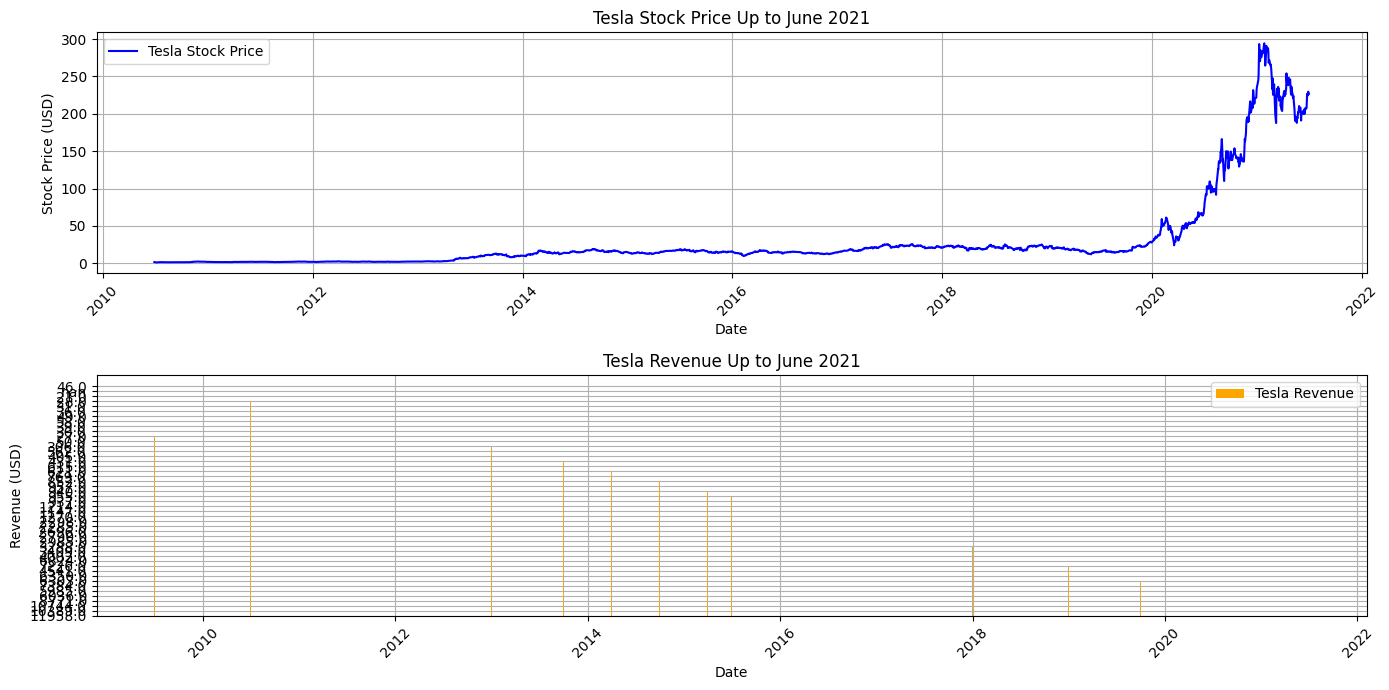

In [36]:
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib.pyplot

# Sample make_graph function definition
def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(14, 7))

    # Plotting stock price
    plt.subplot(2, 1, 1)  # Two rows, one column, first subplot
    plt.plot(stock_data['Date'], stock_data['Close'], label='Tesla Stock Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.title(f'{title} Stock Price Up to June 2021')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()

    # Plotting revenue
    plt.subplot(2, 1, 2)  # Two rows, one column, second subplot
    plt.bar(revenue_data['Date'], revenue_data['Revenue'], label='Tesla Revenue', color='orange')
    plt.xlabel('Date')
    plt.ylabel('Revenue (USD)')
    plt.title(f'{title} Revenue Up to June 2021')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

# Example: Load your Tesla stock data and revenue data
# tesla_data = pd.read_csv('tesla_stock_data.csv')  # Load your stock data
# tesla_revenue = pd.read_csv('tesla_revenue_data.csv')  # Load your revenue data

# Ensure 'Date' is in datetime format
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Filter data to include only up to June 2021
filtered_stock_data = tesla_data[tesla_data['Date'] <= '2021-06-30']
filtered_revenue_data = tesla_revenue[tesla_revenue['Date'] <= '2021-06-30']

# Call the make_graph function
make_graph(filtered_stock_data, filtered_revenue_data, 'Tesla')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Check current working directory
print("Current working directory:", os.getcwd())
print("Files in current directory:", os.listdir(os.getcwd()))

# Define the make_graph function
def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(14, 7))

    # Plotting stock price
    plt.subplot(2, 1, 1)
    plt.plot(stock_data['Date'], stock_data['Close'], label='GameStop Stock Price', color='green')
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.title(f'{title} Stock Price Up to June 2021')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()

    # Plotting revenue
    plt.subplot(2, 1, 2)
    plt.bar(revenue_data['Date'], revenue_data['Revenue'], label='GameStop Revenue', color='orange')
    plt.xlabel('Date')
    plt.ylabel('Revenue (USD)')
    plt.title(f'{title} Revenue Up to June 2021')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

# Load your GameStop stock data and revenue data
try:
    gme_data = pd.read_csv('/full/path/to/gamestop_stock_data.csv')  # Update with the actual path
    print("Loaded GameStop stock data successfully.")
except FileNotFoundError as e:
    print("Error loading gme_data:", e)

try:
    gme_revenue = pd.read_csv('/full/path/to/gamestop_revenue_data.csv')  # Update with the actual path
    print("Loaded GameStop revenue data successfully.")
except FileNotFoundError as e:
    print("Error loading gme_revenue:", e)

# Check if both DataFrames are loaded
if 'gme_data' in locals() and 'gme_revenue' in locals():
    # Ensure 'Date' is in datetime format
    gme_data['Date'] = pd.to_datetime(gme_data['Date'])
    gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

    # Filter data to include only up to June 2021
    filtered_stock_data = gme_data[gme_data['Date'] <= '2021-06-30']
    filtered_revenue_data = gme_revenue[gme_revenue['Date'] <= '2021-06-30']

    # Call the make_graph function
    make_graph(filtered_stock_data, filtered_revenue_data, 'GameStop')
else:
    print("Data loading was unsuccessful. Please check your file paths.")

Current working directory: /resources/PY0220EN/labs/project
Files in current directory: ['.ipynb_checkpoints', 'Final Assignment Webscraping.ipynb', 'Final Assignment-bak-2024-11-25-20-21-25Z.ipynb', 'Final Assignment.ipynb', 'Final_Assignment Library-bak-2024-11-25-20-21-29Z.ipynb', 'Final_Assignment Library.ipynb', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb', 'WebScraping_Review_Lab.ipynb']
Error loading gme_data: [Errno 2] No such file or directory: '/full/path/to/gamestop_stock_data.csv'
Error loading gme_revenue: [Errno 2] No such file or directory: '/full/path/to/gamestop_revenue_data.csv'
Data loading was unsuccessful. Please check your file paths.


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

```toggle ## Change Log
```
```toggle | Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
```
```toggle | ----------------- | ------- | ------------- | ------------------------- |
```
```toggle | 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
```
```toggle | 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
```
```toggle | 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |
```
